---
# **Logistic Regression**
---

**1.** [**Introduction**](#Section1)<br>

**2.** [**More on Logistic Regression**](#Section2)<br>
  - **2.1** [**What is wrong with Linear Regression for Classification ?**](#Section21)
  - **2.2** [**Theory**](#Section22)
  - **2.3** [**Interpretation**](#Section22)

**3.** [**Multiple Linear Regression**](#Section3)<br>

**4.** [**Model Evaluation**](#Section4)<br>
  - **4.1** [**Root Mean Square Error**](#Section41)
  - **4.1** [**R-Squared Statistics (Coefficient of Determination)**](#Section42)

**5.** [**Regression Assumptions**](#Section5)<br>

**6.** [**Case Study - Car Sales problem**](#Section6)<br>
  - **6.1** [**Problem Statement**](#Section61)
  - **6.2** [**Importing libraries**](#Section62)
  - **6.3** [**Data Acquisition and Description**](#Section63)
  - **6.4** [**Data pre-profiling**](#Section64)
  - **6.5** [**Data pre-processing**](#Section65)
  - **6.6** [**Data post-profiling**](#Section66)
  - **6.7** [**Exploratory Data Analysis**](#Section67)  
  - **6.8** [**Feature extraction for regression**](#Section68)  
  - **6.9** [**Feature Transformation**](#Section69)  
  - **6.10** [**Feature Scaling**](#Section610)  
  - **6.11** [**Model Training and Evaluation**](#Section611)  
  

<a name = Section1></a>
# **1. Introduction**

- **Logistic Regression** is a classification algorithm used when the target variable is discreet or categorical.
- This technique forms relationship between features and computes probability of the categorical outcome to make decisions.

<a name = Section2></a>
# **2 More Logistic Regression**

<a name = Section21></a>
## **2.1 <u>What is wrong with Linear Regression for Classification ?</u>**
   
   - The linear regression model can work well for regression, but fails for classification. Why is that? In case of two classes, you could label one of the classes with 0 and the other with 1 and use linear regression. Technically it works and most linear model programs will spit out weights for you. But there are a few problems with this approach:  
       <br>
   
       - A linear model does not output probabilities, but it treats the classes as numbers (0 and 1) and fits the best hyperplane (for a single feature, it is a line) that minimizes the distances between the points and the hyperplane. So it simply interpolates between the points, and you cannot interpret it as probabilities.
       
       <br>
       
       - Since the predicted outcome is not a probability, but a linear interpolation between points, there is no meaningful threshold at which you can distinguish one class from the other.
       
       <br>
       
       - The image below shows application of Linear Regression model for classification of cancer tumor (malignant (1) or not malignant(0)). For distribution on the left, a threshold of 0.5 seems to work but after just adding a few more data points of malignant tumor, the threshold of 0.5 doesn't seem to work.
       
       <img src='images/linear-class-threshold-1.png' width='500' height='400' >
       
       <br>
       
       - Linear models do not extend to classification problems with multiple classes. You would have to start labeling the next class with 2, then 3, and so on. The classes might not have any meaningful order, but the linear model would force a weird structure on the relationship between the features and your class predictions. The higher the value of a feature with a positive weight, the more it contributes to the prediction of a class with a higher number, even if classes that happen to get a similar number are not closer than other classes.
       
      

<a name = Section22></a>
## **2.2 <u>Theory</u>**

   - A solution for classification problem is **Logistic Regression**. Instead of fitting a straight line or a hyperplane, the **Logisitic Regression** model uses the logistic function (sigmoid) to sequeeze the output of a linear equation between 0 and 1.

   $$
   S(x) = \dfrac{1}{1+e^{-x}} ; x \in (-\infty, \infty)
   $$


   $$
   \lim_{x \to -\infty} S(x) = \lim_{x \to -\infty} \dfrac{1}{1+e^{-x}} = 0 
   $$


   $$
   \lim_{x \to \infty} S(x) = \lim_{x \to \infty} \dfrac{1}{1+e^{-x}} = 1 
   $$

       Hence,

   $$
   S(x) \in (0, 1)
   $$

   - The sigmoid function is a probabilistic function that lies in $(0, 1)$
       
   - The step from linear regression to logistic regression is kind of straightforward. For the ith observation or data point we have
   
   Linear Regression, <br>
   $$
   \hat y^{(i)} = \beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)}
   $$
   
   Logistic Regression,
   $$
   P(\hat y^{(i)} = 1 \ | \ (x_1^{(i)}, x_2^{(i)}, ....) ) = S(\hat y^{(i)}) = \dfrac{1}{1 + e^{-(\beta_0 + \beta_1x_1^{(i)} + \beta_2x_2^{(i)} + ..... + \beta_px_p^{(i)})}} 
   $$
   
   
   - Applying the Logistic Regression model to the above tumor example. We can now use a threshold of 0.5 in both cases
   
   <img src='images/logistic-class-threshold-1.png' width='500' height='400' >
   
   
   
<a name = Section22></a>
## **2.3 <u>Interpretation</u>**   
      

# <a name = Section3></a> 
# **3 Multiple Linear Regression**

   - Stepping up the dimensionality in the simple regression line we get the line equation for MLR
   
       $f(X_0, X_1, X_2, ...., X_p) = \beta_0 + \beta_1X_1 + \beta_2 X_2 + ..... + \beta_p X_p$
       
       - $\beta_0$ - Intercept 
       - $\beta_1, \beta_2, \beta_3, ..... , \beta_p$ - Coefficients
       - $X_0, X_1, X_2, ...... ,X_p$ - Predictors
       
   
   - For $p = 1$ we get the case of Linear Regression and the equation is of a straight line
   - For $p = 3$ we have an example of Multiple Linear Regression where the equation represents a hyper-plane
   - Again here also, we want find the set of coefficients $\beta_0, \beta_1,....\beta_p$ having **minimum RSS**


<a name = Section4></a> 
# **4 Model Evaluation**

<a name = Section41></a> 
## **4.1 <u>Root Mean Square Error</u>**

   - 
       $$
       \begin{equation}
       RMSE = \sum_{i} e_i^2 = \sum_{i} (Actual\ Value - Predicted\ Value)_{i^{th}\ observation}^2\\ 
       \end{equation}
       $$

   - We have already discussed why errors have to squared in the above section. The square-root is just to make the units consistence. For example, if the target variable is weight and has units. RSS will have a unit of $kg^2$ which doesn't make sense and is not a physical quantity. After the square root, the units become $kg$
  
<a name = Section42></a>   
## **4.2 <u>R-Squared Statistics (Coefficient of Determination)</u>**

   - R-squared ($R^2$) is a statistical measure that represents the proportion of the variance for a dependent variable(target) that's explained by an independent variable(s)(predictors) in a regression model.
   
   - <u>Note</u> : Correlation explains the strength of relationship between independent variable and dependent variable. Where as $R^2$ explains to what extent variance of one variable explains the variance of another variable.
   
   - For example: if $R^2$ value for a model is 0.5, it means that approximately half of the observed variation in the target variable can be explained by model's input.
   
   - The value of $R^2$ ranges from 0 to 1. It's the test data set that we are more interested in while computing $R^2$.
   
   - To calculate the value $R^2$ we first need to apply least squares and regression to compute the predicted values for the actual observations. After this we use the following formula
   
   $R^2 = 1 - \dfrac{Unexplained\ Variance\ in\ the\ predicted\ values}{Total\ Variance}$
   
   Let's assume we have n observations $x_1, x_2, .... , x_n $ on which we have run a regression model to get the best fit line and arrived at the following predicted values $y_1, y_2, .... , y_n$.
   
   $
   \begin{equation*}
   Unexplained\ Variance\ = Fraction\ of\ variance\ unaccounted\ for\ \\ 
   \qquad \qquad \qquad \qquad = variance\ coming\ from\ the\ errors(residuals) \\ 
   \qquad \qquad \qquad \qquad = Residual\ Sum\ of\ Squares \\
   \qquad \qquad \qquad \qquad = \sum_{i=1}^{n} (y_i - x_i)^2 = \sum_{i=1}^{n} (e_i)^2
   \end{equation*}
   $
   
   $
   \begin{equation*}
   Total\ Variance\ = \sum_{i=1}^{n} (x_i - \bar{x})^2 \ (this\ is\ actually\ not\ an\ inequality\ but\ a\ proportionality\)
   \end{equation*}
   $
   
   Hence, <br>
   
   $R^2 = 1 - \dfrac{Unexplained\ Variance\ in\ the\ predicted\ values}{Total\ Variance} = 
           1 - \dfrac{\sum_{i=1}^{n} (e_i)^2}{\sum_{i=1}^{n} (x_i - \bar{x})^2}$
   

<a name = Section5></a> 
# **5 Regression Assumptions**  

   - There is linear relationship between predictor and the target variable.
   - There should be no auto-correlation between the values of predictors.
   - Residuals are normally distributed.
   - There is no (low) correlation between independent variables (also known as ‘Multi Collinearity’).
   - The variance of the residuals is constant across all values of the independent variable X. (also known as ‘Homoscedasticity’).

<a name = Section6></a>
# **6 Case Study - Car Sales problem**  

<a name = Section61></a>
## **6.1 <u>Problem Statement</u>**

 - A famous car dealer - LinReg Cars has recently seen some decline in their car sales.

 - They need to find the causes of the decline and want to estimate the future sales volume for their dealership.

 - They have hired you - a data scientist to analyze their previous sales volume data.

 - Your objective is to find which features have more impact on car sales and provide information on it.

 - Additionally, you have to train a regression model to predict car sales and check the accuracy of your model's predictions.


<a name = Section62></a>
## **6.2 <u>Importing libraries</u>**


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings                                                                   # Importing warning to disable runtime warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error                                    # To calculate the MSE of a regression model
from sklearn.metrics import mean_absolute_error                                   # To calculate the MAE of a regression model
from sklearn.metrics import r2_score 

<a name = Section63></a>
## **6.3 <u>Data Acquisition and Description</u>**

In [2]:
car = pd.read_csv(filepath_or_buffer="https://raw.githubusercontent.com/insaid2018/Term-2/master/Data/car_sales.csv")
print('Data Shape:', car.shape)
car.head()

Data Shape: (156, 16)


,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639


In [3]:
car.describe()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Power_perf_factor
count,151.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,52.051742,18.063571,27.401071,3.060897,185.948718,107.487179,71.150000,187.343590,3.380462,17.951923,23.833333,77.128857
std,68.907116,10.076941,14.305863,1.044653,56.700321,7.641303,3.451872,13.431754,0.629200,3.887921,4.256052,25.084045
min,0.110000,5.160000,9.235000,1.000000,55.000000,92.600000,62.600000,149.400000,1.895000,10.300000,15.000000,23.276272
25%,13.630000,12.527500,18.081250,2.300000,149.500000,103.000000,68.400000,177.575000,2.973000,15.800000,21.000000,60.567577
50%,27.609000,17.617500,23.099500,3.000000,177.500000,107.000000,70.550000,187.900000,3.355000,17.200000,24.000000,72.160636
75%,65.905500,18.089731,31.938750,3.575000,215.000000,112.200000,73.425000,196.125000,3.788750,19.575000,26.000000,89.623790
max,540.561000,67.550000,85.500000,8.000000,450.000000,138.700000,79.900000,224.500000,5.572000,32.000000,45.000000,188.144323


In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        156 non-null    object 
 1   Model               156 non-null    object 
 2   Sales_in_thousands  151 non-null    float64
 3   _year_resale_value  156 non-null    float64
 4   Vehicle_type        156 non-null    object 
 5   Price_in_thousands  156 non-null    float64
 6   Engine_size         156 non-null    float64
 7   Horsepower          156 non-null    int64  
 8   Wheelbase           156 non-null    float64
 9   Width               156 non-null    float64
 10  Length              156 non-null    float64
 11  Curb_weight         156 non-null    float64
 12  Fuel_capacity       156 non-null    float64
 13  Fuel_efficiency     156 non-null    int64  
 14  Latest_Launch       156 non-null    object 
 15  Power_perf_factor   156 non-null    float64
dtypes: float

In [5]:
car['Vehicle_type'].value_counts()

Passenger    116
Car           40
Name: Vehicle_type, dtype: int64

<a name = Section64></a>
## **6.4 <u>Data pre-profiling</u>**

  - Sales_in_thousands column has 5 missing values. Replace with median.
  - Power_perf_factor has strong correlation with Horsepower and hence can be dropped.
  - Model, Manufacturer and Last_launch will not help us in predicting sales. Hence these can also be dropped.
  - We will have to convert the categorical variable Vehicle_type into some numerical data using one-hot encoding so that it can be used in regression.
  - Take care of the outliers.

In [6]:
car[car['Sales_in_thousands'].isnull()]

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
45,Ford,Escort,NaN,7.425,Passenger,12.070,2.0,110,98.4,67.0,174.7,2.468,12.7,30,3/31/2012,44.083709
46,Ford,Mustang,NaN,12.760,Passenger,21.560,3.8,190,101.3,73.1,183.2,3.203,15.7,24,1/31/2012,76.509185
47,Ford,Contour,NaN,8.835,Passenger,17.035,2.5,170,106.5,69.1,184.6,2.769,15.0,25,8/20/2012,67.351011
50,Ford,Crown Victoria,NaN,14.210,Passenger,22.195,4.6,200,114.7,78.2,212.0,3.908,19.0,21,9/26/2011,80.499537
53,Ford,Expedition,NaN,23.575,Car,36.135,4.6,240,119.0,78.7,204.6,4.808,26.0,16,9/14/2012,100.024802


<AxesSubplot:>

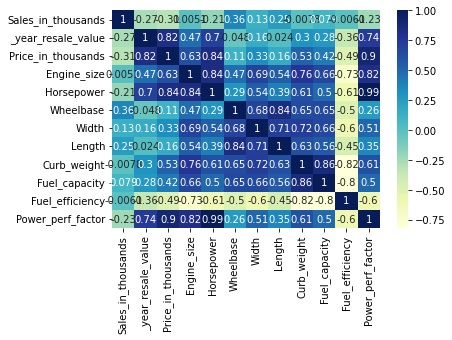

In [7]:
sns.heatmap(car.corr(), cmap="YlGnBu", annot = True)

<a name = Section65></a>
## **6.5 <u>Data pre-processing</u>**

In [8]:
### impute missing values with median.

car['Sales_in_thousands'].fillna(value=car.groupby('Manufacturer')['Sales_in_thousands'].transform(func='median'), inplace=True)

In [9]:
### convert categorical column Vehicle_type into 1s and 0s

car_dummy = pd.get_dummies(data=car, columns=['Vehicle_type'], drop_first=True)
car_dummy.head()

,Manufacturer,Model,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor,Vehicle_type_Passenger
0,Acura,Integra,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,2/2/2012,58.280150,1
1,Acura,TL,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,6/3/2011,91.370778,1
2,Acura,CL,14.114,18.225,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1/4/2012,90.345000,1
3,Acura,RL,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,3/10/2011,91.389779,1
4,Audi,A4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,10/8/2011,62.777639,1


In [10]:
### drop the columns that are not required

drop_cols = ['Manufacturer', 'Model', 'Power_perf_factor', 'Latest_Launch'];
car_dummy.drop(columns=drop_cols, inplace=True)
car_dummy.head()


,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Vehicle_type_Passenger
0,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,1
1,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,1
2,14.114,18.225,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1
3,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,1
4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,1


In [11]:
### Remove the outliers outside the range of 15th quantile - 85th quantile

Q1 = car_dummy.quantile(0.05)  # instead of 25th percentile we are using 15th percentile
Q3 = car_dummy.quantile(0.95)  # instead of 75th percentile we are using 85th percentile

IQR = Q3 - Q1

car_dummy = car_dummy[~((car_dummy < Q1 -1.5*IQR) | (car_dummy > Q3 + 1.5*IQR)).any(axis=1)]

<a name = Section66></a>
## **6.6 <u>Data post-profiling</u>**

In [12]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Manufacturer        156 non-null    object 
 1   Model               156 non-null    object 
 2   Sales_in_thousands  156 non-null    float64
 3   _year_resale_value  156 non-null    float64
 4   Vehicle_type        156 non-null    object 
 5   Price_in_thousands  156 non-null    float64
 6   Engine_size         156 non-null    float64
 7   Horsepower          156 non-null    int64  
 8   Wheelbase           156 non-null    float64
 9   Width               156 non-null    float64
 10  Length              156 non-null    float64
 11  Curb_weight         156 non-null    float64
 12  Fuel_capacity       156 non-null    float64
 13  Fuel_efficiency     156 non-null    int64  
 14  Latest_Launch       156 non-null    object 
 15  Power_perf_factor   156 non-null    float64
dtypes: float

<a name = Section67></a>
## **6.7 <u>Exploratory Data Analysis</u>**

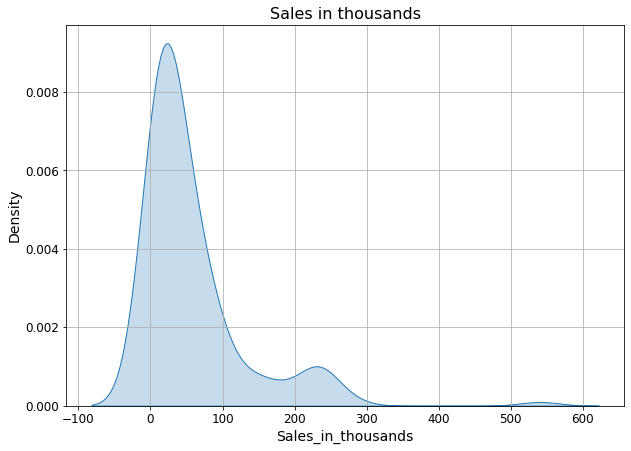

In [13]:
### Looking at the distribution of target variable

fig = plt.figure(figsize=(10, 7))
sns.kdeplot(x = car_dummy['Sales_in_thousands'], shade=True)
plt.xlabel(xlabel='Sales_in_thousands', size=14)
plt.ylabel(ylabel='Density', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Sales in thousands', size=16)
plt.grid(b=True)
plt.show()

 - There is a skewness in the target variable

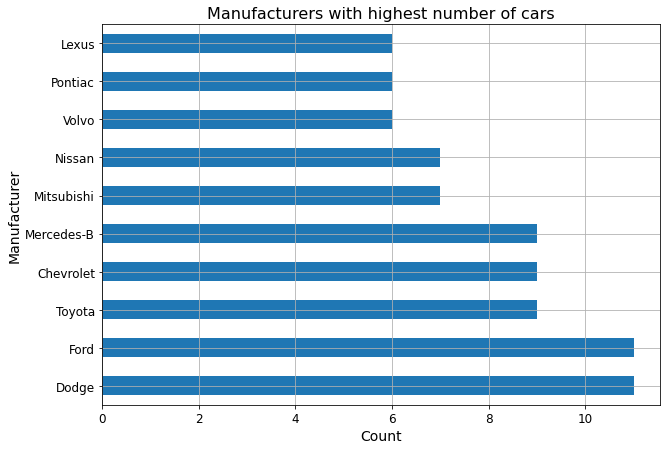

In [14]:
### Top 10 manufacturers with most amount of cars listed

plt.figure(figsize=(10, 7))
car['Manufacturer'].value_counts().nlargest(10).plot(kind='barh')
plt.ylabel(ylabel='Manufacturer', size=14)
plt.xlabel(xlabel='Count', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Manufacturers with highest number of cars', size=16)
plt.grid(b=True)
plt.show()

  - Ford and Dodge have maximum no of listed models

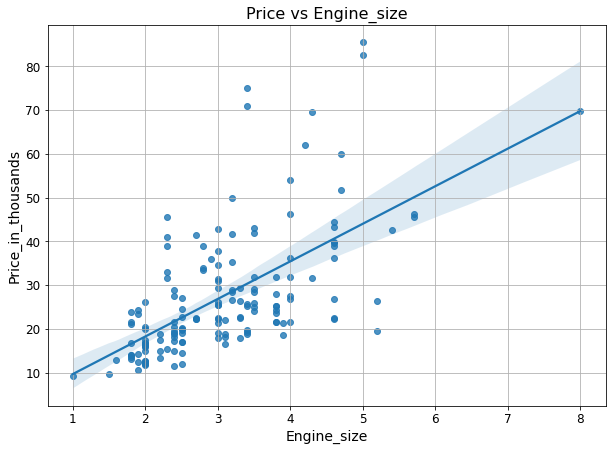

In [15]:
### Relationship between Engine_size and Price_in_thousands features.

plt.figure(figsize=(10, 7))
sns.regplot(data=car_dummy, x='Engine_size', y='Price_in_thousands')
plt.ylabel(ylabel='Price_in_thousands', size=14)
plt.xlabel(xlabel='Engine_size', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Price vs Engine_size', size=16)
plt.grid(b=True)
plt.show()

  - The engine size and the price in thousands are highly correlated in +ve direction which is intuitive

<Figure size 1080x720 with 0 Axes>

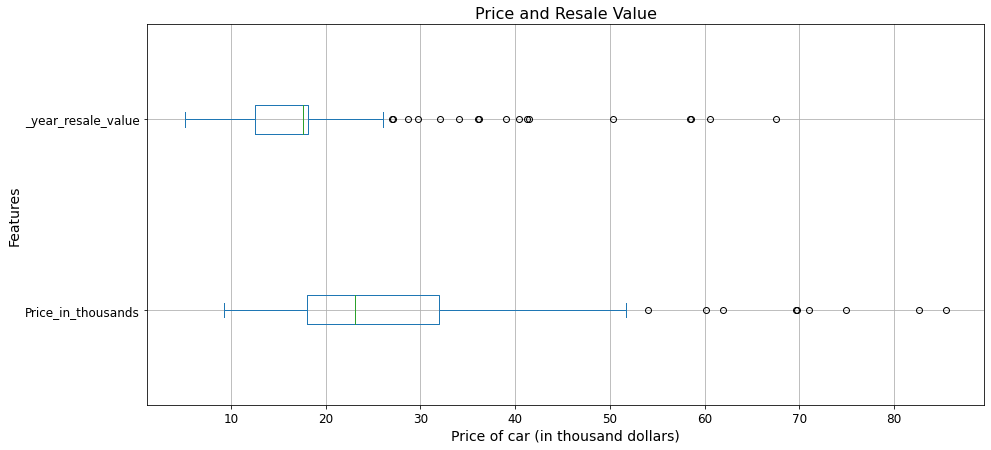

In [16]:
### Boxplot for Price_in_thousands and _year_resale_value features

plt.figure(figsize=(15,10))
car_dummy[['Price_in_thousands', '_year_resale_value']].plot(kind='box', figsize=(15, 7), vert=False)
plt.ylabel(ylabel='Features', size=14)
plt.xlabel(xlabel='Price of car (in thousand dollars)', size=14)
plt.xticks(size=12)
plt.yticks(size=12)
plt.title(label='Price and Resale Value', size=16)
plt.grid(b=True)
plt.show()

<a name = Section68></a>
## **6.8 <u>Feature extraction for regression</u>**

In [17]:
df = car_dummy

In [18]:
df.head()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Vehicle_type_Passenger
0,16.919,16.360,21.50,1.8,140,101.2,67.3,172.4,2.639,13.2,28,1
1,39.384,19.875,28.40,3.2,225,108.1,70.3,192.9,3.517,17.2,25,1
2,14.114,18.225,29.00,3.2,225,106.9,70.6,192.0,3.470,17.2,26,1
3,8.588,29.725,42.00,3.5,210,114.6,71.4,196.6,3.850,18.0,22,1
4,20.397,22.255,23.99,1.8,150,102.6,68.2,178.0,2.998,16.4,27,1


<a name = Section69></a>
## **6.9 <u>Feature Transformation</u>**

In [19]:
### Doing a log transformation to take care of the skewness in the data

df['Sales_in_thousands'] = np.log1p(df['Sales_in_thousands'])
df['_year_resale_value'] = np.log(df['_year_resale_value'])
df['Price_in_thousands'] = np.log(df['Price_in_thousands'])

<a name = Section610></a>
## **6.10 <u>Feature Scaling</u>**

In [20]:
sc = StandardScaler()
scaled_data = sc.fit_transform(df)
scaled_dataframe = pd.DataFrame(data=scaled_data, columns=df.columns)

In [21]:
scaled_dataframe.head()

,Sales_in_thousands,_year_resale_value,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Vehicle_type_Passenger
0,-0.438540,0.019597,-0.293665,-1.210889,-0.812988,-0.825439,-1.118929,-1.116140,-1.182214,-1.226164,0.982151,0.58722
1,0.231226,0.462890,0.320539,0.133586,0.690949,0.080457,-0.247036,0.415009,0.217702,-0.194023,0.275002,0.58722
2,-0.578861,0.265486,0.366674,0.133586,0.690949,-0.077090,-0.159847,0.347788,0.142763,-0.194023,0.510719,0.58722
3,-0.953986,1.379723,1.183978,0.421687,0.425549,0.933837,0.072658,0.691363,0.748650,0.012406,-0.432146,0.58722
4,-0.292326,0.720507,-0.051846,-1.210889,-0.636055,-0.641634,-0.857361,-0.697875,-0.609811,-0.400451,0.746435,0.58722


In [22]:
### separate the target variable and the predictors

X = scaled_dataframe.drop(columns=['Sales_in_thousands'], axis = 1)
y = scaled_dataframe['Sales_in_thousands']

In [23]:
X.head()
y.head()

0   -0.438540
1    0.231226
2   -0.578861
3   -0.953986
4   -0.292326
Name: Sales_in_thousands, dtype: float64

In [24]:
### split the data into training and test sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 1)
print('Training Data Shape:', X_train.shape, y_train.shape)
print('Testing Data Shape:', X_test.shape, y_test.shape)

Training Data Shape: (132, 11) (132,)
Testing Data Shape: (24, 11) (24,)


<a name = Section611></a>
## **6.11 <u>Model Training and Evaluation</u>**

In [25]:
clf = LinearRegression()

In [26]:
def train_n_eval(clf=None):

    # Extracting model name
    model_name = type(clf).__name__

    # Fit the model on train data
    clf.fit(X_train, y_train)

    # Make predictions using test data
    y_pred = clf.predict(X_test)

    # Make predictions using test data
    y_pred_train = clf.predict(X_train)

    # Calculate test accuracy of the model
    clf_r2 = r2_score(y_test, y_pred)

    # Calculate train accuracy of the model
    clf_r2_train = r2_score(y_train, y_pred_train)

    # Display the accuracy of the model
    print('Performance Metrics for', model_name, ':')
    print('[R2-Score Train]:', clf_r2_train)
    print('[R2-Score Test]:', clf_r2)

In [27]:
train_n_eval(clf)

Performance Metrics for LinearRegression :
[R2-Score Train]: 0.5191127110621272
[R2-Score Test]: 0.1452637244376057
